In [1]:
import os
import shutil

In [2]:
!kaggle datasets download -d eeshawn/flickr30k

!unzip flickr30k.zip

Streaming output truncated to the last 5000 lines.
  inflating: flickr30k_images/5354811242.jpg  
  inflating: flickr30k_images/5354904685.jpg  
  inflating: flickr30k_images/5354911151.jpg  
  inflating: flickr30k_images/535529555.jpg  
  inflating: flickr30k_images/5356236664.jpg  
  inflating: flickr30k_images/5356318668.jpg  
  inflating: flickr30k_images/535830521.jpg  
  inflating: flickr30k_images/5359437945.jpg  
  inflating: flickr30k_images/5361355399.jpg  
  inflating: flickr30k_images/53614287.jpg  
  inflating: flickr30k_images/536147209.jpg  
  inflating: flickr30k_images/5361551308.jpg  
  inflating: flickr30k_images/536156200.jpg  
  inflating: flickr30k_images/5362687336.jpg  
  inflating: flickr30k_images/5363528971.jpg  
  inflating: flickr30k_images/5363903246.jpg  
  inflating: flickr30k_images/5364849864.jpg  
  inflating: flickr30k_images/536495604.jpg  
  inflating: flickr30k_images/5365075444.jpg  
  inflating: flickr30k_images/536533294.jpg  
  inflating: flic

In [3]:
!wget https://raw.githubusercontent.com/Ramkanc/IIITHgrp20/refs/heads/main/Flickr30k.csv

--2025-02-22 07:57:48--  https://raw.githubusercontent.com/Ramkanc/IIITHgrp20/refs/heads/main/Flickr30k.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12425106 (12M) [text/plain]
Saving to: ‘Flickr30k.csv’

Flickr30k.csv       100%[===================>]  11.85M  --.-KB/s    in 0.1s    

2025-02-22 07:57:48 (112 MB/s) - ‘Flickr30k.csv’ saved [12425106/12425106]



In [4]:
image_data_location = "/content/flickr30k_images"
caption_data_location = "/content/Flickr30k.csv"

In [5]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
# Collect images from image_data_location folder which are getting opened
images_good = []
for filename in os.listdir(image_data_location):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        try:
            img = Image.open(os.path.join(image_data_location, filename))
            images_good.append(filename.split(".")[0]) #append to a list
        except IOError:
            print("Unable to open image:", filename)

print(f"Loaded {len(images_good)} images")

Loaded 31783 images


In [9]:
raw_df = pd.read_csv(caption_data_location, sep=",", header=0)#, names=['image','caption'])

In [10]:
# Clean image names
raw_df['image'] = raw_df['image'].astype(str).str.strip()

raw_df.head()

image                                            caption
0  1000092795   Two young guys with shaggy hair look at their...
1  1000092795   Two young , White males are outside near many...
2  1000092795   Two men in green shirts are standing in a yard .
3  1000092795       A man in a blue shirt standing in a garden .
4  1000092795            Two friends enjoy time spent together .

In [11]:
# Find df[image] rows not in images_good list
indices_not_in_list = []
for index, image_name in raw_df['image'].items():
    if image_name not in images_good:
        print(image_name)
        indices_not_in_list.append(index)

In [12]:
df = raw_df.drop(indices_not_in_list, inplace=False)
print(df.head())
print(f"raw df shape - {raw_df.shape}")
print(f"new df shape - {df.shape}")


        image                                            caption
0  1000092795   Two young guys with shaggy hair look at their...
1  1000092795   Two young , White males are outside near many...
2  1000092795   Two men in green shirts are standing in a yard .
3  1000092795       A man in a blue shirt standing in a garden .
4  1000092795            Two friends enjoy time spent together .
raw df shape - (158914, 2)
new df shape - (158914, 2)


In [13]:
# Find the maximum words string from df['captions'] column
df['word_count'] = df['caption'].apply(lambda x: len(x.split()))
max_words_string = df.loc[df['word_count'].idxmax(), 'caption']
avg_words = df['word_count'].mean()
print(f"The string with the maximum words is:\n{max_words_string}")
print(f"the length of the string is {len(max_words_string.split())}")
print(f"The average length of the string is {avg_words}")

The string with the maximum words is:
 A man wearing a helmet , red pants with white stripes going down the sides and a white and red shirt is on a small bicycle using only his hands while his legs are up in the air , while another man wearing a light blue shirt with dark blue trim and black pants with red stripes going up the sides is standing nearby , gesturing toward the first man and holding a small figurine of one of the seven dwarves .
the length of the string is 82
The average length of the string is 13.389418175868709


/content/flickr30k_images/1000268201.jpg


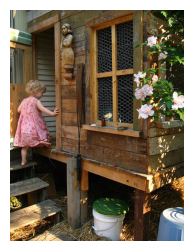

In [14]:
data_idx = 11
image_name = df.iloc[data_idx,0]
image_path = image_data_location + "/" + image_name+".jpg"
print(image_path)

img = mpimg.imread(image_path)
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.axis('off')
plt.show()

In [15]:
for i in range(data_idx, data_idx+5):
    print(f"Caption - {df.iloc[i,1]}")

Caption -  A little girl in a pink dress going into a wooden cabin .
Caption -  A little girl climbing the stairs to her playhouse .
Caption -  A little girl climbing into a wooden playhouse 
Caption -  A girl going into a wooden building .
Caption -  Someone in a blue shirt and hat is standing on stair and leaning against a window .


In [16]:
def create_image_caption_dict(df):
    image_caption_dict = {}
    for image, group in df.groupby('image'):
        image_caption_dict[image] = group['caption'].tolist()
    return image_caption_dict

In [17]:
image_captions = create_image_caption_dict(df)

In [18]:
image_captions_iter = iter(image_captions.items())
print(len(image_captions))
print (next(image_captions_iter))

31783
('1000092795', [' Two young guys with shaggy hair look at their hands while hanging out in the yard .', ' Two young , White males are outside near many bushes .', ' Two men in green shirts are standing in a yard .', ' A man in a blue shirt standing in a garden .', ' Two friends enjoy time spent together .'])


In [19]:
df.head()

image                                            caption  word_count
0  1000092795   Two young guys with shaggy hair look at their...          17
1  1000092795   Two young , White males are outside near many...          11
2  1000092795   Two men in green shirts are standing in a yard .          11
3  1000092795       A man in a blue shirt standing in a garden .          11
4  1000092795            Two friends enjoy time spent together .           7

In [20]:
# Preprocess dataset
image_folder = image_data_location
dataframe = df.drop(columns=['word_count'])

In [21]:
!pip install nltk

In [22]:
#!pip install transformers datasets torch torchvision nltk

In [23]:
import os
import pandas as pd
import torch
from PIL import Image
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Load model, processor, tokenizer
model_name = "nlpconnect/vit-gpt2-image-captioning"
model = VisionEncoderDecoderModel.from_pretrained(model_name)
processor = ViTImageProcessor.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

In [ ]:
# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(i

In [ ]:
# Convert to dictionary format
captions_dict = dataframe.groupby("image")["caption"].apply(list).to_dict()

In [ ]:
class Flickr8kDataset(Dataset):
    def __init__(self, image_folder, captions_dict, processor, tokenizer, max_length=30):
        self.image_folder = image_folder
        self.captions_dict = captions_dict
        self.processor = processor
        self.tokenizer = tokenizer
        self.image_filenames = list(captions_dict.keys())
        self.max_length = max_length

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        image_filename = self.image_filenames[idx]
        image_path = os.path.join(self.image_folder, image_filename + ".jpg")

        image = Image.open(image_path).convert("RGB")  # Load and convert image

        # Preprocess image
        pixel_values = self.processor(images=image, return_tensors="pt").pixel_values.squeeze(0)

        # Select a random caption
        caption = self.captions_dict[image_filename][0]  # Using first caption for simplicity

        # Tokenize caption
        caption_encoding = self.tokenizer(caption, padding="max_length", truncation=True, max_length=self.max_length, return_tensors="pt")

        return {
            "pixel_values": pixel_values,
            "input_ids": caption_encoding["input_ids"].squeeze(0),
            "attention_mask": caption_encoding["attention_mask"].squeeze(0)
        }




In [ ]:
# Initialize dataset
dataset = Flickr8kDataset(image_data_location, captions_dict, processor, tokenizer)



In [ ]:
# DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

In [ ]:
from torch.optim import AdamW

# Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

In [ ]:
# Training loop
epochs = 20
model.train()
epoch_losses = []  # List to store average loss per epoch

for epoch in range(epochs):
    total_loss = 0
    print(f"\nEpoch {epoch+1}/{epochs}")  # Print epoch number

    for batch_idx, batch in enumerate(dataloader):
        pixel_values = batch["pixel_values"].to(device)
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        # Forward pass
        outputs = model(pixel_values=pixel_values, labels=input_ids, decoder_attention_mask=attention_mask)
        loss = outputs.loss
        total_loss += loss.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print batch loss
        #print(f"  Batch {batch_idx+1}/{len(dataloader)} - Loss: {loss.item():.4f}")

    # Compute average loss for the epoch
    avg_loss = total_loss / len(dataloader)
    epoch_losses.append(avg_loss)  # Store in list
    print(f"Epoch {epoch+1} - Average Loss: {avg_loss:.4f}\n")


Epoch 1/20
Epoch 1 - Average Loss: 1.1120


Epoch 2/20
Epoch 2 - Average Loss: 0.9014


Epoch 3/20
Epoch 3 - Average Loss: 0.7851


Epoch 4/20
Epoch 4 - Average Loss: 0.6832


Epoch 5/20
Epoch 5 - Average Loss: 0.5850


Epoch 6/20
Epoch 6 - Average Loss: 0.4910


Epoch 7/20
Epoch 7 - Average Loss: 0.4032


Epoch 8/20
Epoch 8 - Average Loss: 0.3255


Epoch 9/20
Epoch 9 - Average Loss: 0.2565


Epoch 10/20
Epoch 10 - Average Loss: 0.2038


Epoch 11/20
Epoch 11 - Average Loss: 0.1619


Epoch 12/20
Epoch 12 - Average Loss: 0.1289


Epoch 13/20
Epoch 13 - Average Loss: 0.1014


Epoch 14/20
Epoch 14 - Average Loss: 0.0875


Epoch 15/20
Epoch 15 - Average Loss: 0.0720


Epoch 16/20
Epoch 16 - Average Loss: 0.0637


Epoch 17/20
Epoch 17 - Average Loss: 0.0560


Epoch 18/20
Epoch 18 - Average Loss: 0.0489


Epoch 19/20
Epoch 19 - Average Loss: 0.0438


Epoch 20/20
Epoch 20 - Average Loss: 0.0412



In [ ]:
# Print all collected losses
print("Loss per epoch:", epoch_losses)

Loss per epoch: [1.1120080990282444, 0.9013986801912662, 0.7850611685764177, 0.6832194225825811, 0.5850213989909929, 0.4909590747752208, 0.40321406745627936, 0.32545490215418366, 0.2565141836173921, 0.20377830625051566, 0.16188675742375522, 0.1289116784105659, 0.10138348506196686, 0.08747861746389404, 0.07200506067440915, 0.06371014108770921, 0.055958851038113884, 0.04890530549814343, 0.04381996854815794, 0.041175660894440094]


In [ ]:


# Assuming epoch_losses is already defined from your training loop
# Example: epoch_losses = [0.8, 0.7, 0.6, 0.55, ...]

# Create a list of epochs (0 to len(epoch_losses)-1)
epochs = list(range(len(epoch_losses)))

# Create a pandas DataFrame
df_losses = pd.DataFrame({'epoch': epochs, 'loss': epoch_losses})

# Display the DataFrame
df_losses


epoch      loss
0       0  1.112008
1       1  0.901399
2       2  0.785061
3       3  0.683219
4       4  0.585021
5       5  0.490959
6       6  0.403214
7       7  0.325455
8       8  0.256514
9       9  0.203778
10     10  0.161887
11     11  0.128912
12     12  0.101383
13     13  0.087479
14     14  0.072005
15     15  0.063710
16     16  0.055959
17     17  0.048905
18     18  0.043820
19     19  0.041176

In [ ]:
# Save the trained model
model.save_pretrained("vit-gpt2-flickr8k")
tokenizer.save_pretrained("vit-gpt2-flickr8k")

('vit-gpt2-flickr8k/tokenizer_config.json',
 'vit-gpt2-flickr8k/special_tokens_map.json',
 'vit-gpt2-flickr8k/vocab.json',
 'vit-gpt2-flickr8k/merges.txt',
 'vit-gpt2-flickr8k/added_tokens.json',
 'vit-gpt2-flickr8k/tokenizer.json')

In [ ]:
def generate_caption(image_path):
    image = Image.open(image_path).convert("RGB")
    pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(device)

    model.eval()
    with torch.no_grad():
        output_ids = model.generate(pixel_values, max_length=30, num_beams=5)

    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return caption.strip()

In [ ]:
random_samples = np.random.choice(list(captions_dict.keys()), size=20)

In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=dd3a59f1b54d0dcd2b0573a9ad3dd4f2a1845dd3174927425aa30b49f30da0db
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.1 MB/s eta 0:00:00


In [ ]:
# prompt: provide code for testing loop with losss scores, BLUE scores, ROUGE and WER , to generate caption  for the images  in random_samples list

from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
import jiwer

# Initialize metrics
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Testing loop
for image_name in random_samples:
    image_path = os.path.join(image_data_location, image_name + ".jpg")
    generated_caption = generate_caption(image_path)

    # Get reference captions
    reference_captions = captions_dict[image_name]

    # Calculate BLEU score
    bleu_scores = [sentence_bleu([ref.split()], generated_caption.split()) for ref in reference_captions]
    avg_bleu = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0

    # Calculate ROUGE scores
    rouge_scores = [scorer.score(ref, generated_caption) for ref in reference_captions]
    avg_rouge1 = sum(score['rouge1'].fmeasure for score in rouge_scores) / len(rouge_scores)
    avg_rougeL = sum(score['rougeL'].fmeasure for score in rouge_scores) / len(rouge_scores)

    # Calculate WER
    wer_scores = [jiwer.wer(ref, generated_caption) for ref in reference_captions]
    avg_wer = sum(wer_scores) / len(wer_scores) if wer_scores else 0

    # Print results
    print(f"\nImage: {image_name}")
    ing = mpimg.imread(image_path)
    plt.figure(figsize=(3,3))
    plt.imshow(ing)
    plt.axis('off')
    plt.show()
    print(f"Generated Caption: {generated_caption}")
    print(f"Reference Captions: {reference_captions}")
    print(f"BLEU Score: {avg_bleu:.4f}")
    print(f"ROUGE-1 Score: {avg_rouge1:.4f}")
    print(f"ROUGE-L Score: {avg_rougeL:.4f}")
    print(f"WER Score: {avg_wer:.4f}")


Output hidden; open in https://colab.research.google.com to view.

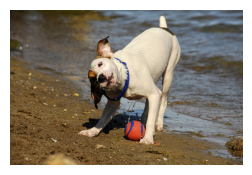

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


Generated Caption: A dog shakes its head near the shore , a red ball next to it .


In [ ]:
# Test with an image
test_image = "/content/dataset/Flicker8k_Dataset/1012212859_01547e3f17.jpg"
img = Image.open(test_image)
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.axis('off')
plt.show()
print("Generated Caption:", generate_caption(test_image))

In [ ]:
print(f"Metrics flickr8k Transformer ")
print("="*25)
print(f"Average Loss: {avg_loss:.4f}")
print(f"BLEU Score: {avg_bleu:.4f}")
print(f"ROUGE-1 Score: {avg_rouge1:.4f}")
print(f"ROUGE-L Score: {avg_rougeL:.4f}")

Metrics flickr8k Transformer 
Average Loss: 0.0412
BLEU Score: 0.2000
ROUGE-1 Score: 0.5351
ROUGE-L Score: 0.5351


In [ ]:
# prompt: provide code to download the saved model

#from google.colab import files
#files.download("vit-gpt2-flickr8k")


In [ ]:
# prompt: gip the vit-gpt2-flickr8k folder and download

!zip -r vit-gpt2-flickr8k.zip vit-gpt2-flickr8k
!ls
files.download("vit-gpt2-flickr8k.zip")


  adding: vit-gpt2-flickr8k/ (stored 0%)
  adding: vit-gpt2-flickr8k/tokenizer_config.json (deflated 57%)
  adding: vit-gpt2-flickr8k/generation_config.json (deflated 40%)
  adding: vit-gpt2-flickr8k/config.json (deflated 76%)
  adding: vit-gpt2-flickr8k/merges.txt (deflated 53%)
  adding: vit-gpt2-flickr8k/tokenizer.json (deflated 82%)
  adding: vit-gpt2-flickr8k/model.safetensors (deflated 7%)
  adding: vit-gpt2-flickr8k/vocab.json (deflated 59%)
  adding: vit-gpt2-flickr8k/special_tokens_map.json (deflated 81%)
dataset  sample_data  vit-gpt2-flickr8k  vit-gpt2-flickr8k.zip
